### Importing modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '/home/LC/kollad01/gray_fox/scripts')
from ANGSD_to_ML1 import *

from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score, calinski_harabasz_score

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Loading data

In [2]:
bamID_to_sampleID = pd.read_csv('./data/meta/bamID_to_sampleID.csv',header=None)
X = ANGSD_to_ML1('./data/genotype/geno_vcf.geno', bamID_to_sampleID)

In [3]:
X

,0,1,2,3,4,5,6,7,8,9,...,2536,2537,2538,2539,2540,2541,2542,2543,2544,2545
1,,,,,,,,,,,,,,,,,,,,,
ucin246z,0.0,0.0,0.0,1.0,1.0,0.000000,0.000000,0.0,2.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.000000,0.0,1.0,0.000000,0.0
ucin213conc,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,0.0,2.0,1.0,...,2.0,0.0,1.0,1.0,0.0,0.000000,0.0,1.0,0.000000,0.0
ucin153conc,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,2.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0
ucin266reconc,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0
828RE,0.0,0.0,0.0,2.0,2.0,0.000000,1.000000,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,2.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ucin349conc,0.0,1.0,0.0,2.0,2.0,0.000000,0.000000,0.0,1.0,0.0,...,1.0,2.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.101449,1.0
ucin408re,0.0,2.0,0.0,2.0,2.0,0.204663,0.208333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
ucin431z,0.0,1.0,1.0,2.0,2.0,0.000000,1.000000,1.0,1.0,0.0,...,1.0,2.0,1.0,0.0,0.0,1.000000,0.0,0.0,0.000000,1.0


# Algorithm comparison

In [5]:
score_table = pd.DataFrame(
    columns=["Silhouette score", "Calinski-Harabasz"]
)

In [6]:
score_table

,Silhouette score,Calinski-Harabasz


In [7]:
pca_reduction_obj = PCA(n_components = 2, random_state = 42)
d2_pca = pd.DataFrame(pca_reduction_obj.fit_transform(X))

In [38]:
%%time
TSNE_reduction_obj = TSNE(n_components = 2, perplexity = 100,
                          random_state=42, method='exact',
                         verbose=1)
d2_tsne = pd.DataFrame(TSNE_reduction_obj.fit_transform(X))

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 456 / 456
[t-SNE] Mean sigma: 11.894669
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.424655
[t-SNE] KL divergence after 1000 iterations: 0.961053
CPU times: user 20.4 s, sys: 1min 22s, total: 1min 43s
Wall time: 7.02 s


### K-means

In [9]:
%%time
kmeans = KMeans(n_clusters = 3, n_init=50, max_iter=100, random_state=42)
kmeans.fit(X)
kmeans_sil_score = round(silhouette_score(X, kmeans.labels_, metric = 'euclidean'),3)
kmeans_cal_hara_score = round(calinski_harabasz_score(X, kmeans.labels_),3)
print(f'Silhouette score: {kmeans_sil_score}')
print(f'Calinski-Harabasz: {kmeans_cal_hara_score}')
score_table.loc['kmeans'] = [kmeans_sil_score, kmeans_cal_hara_score]

Silhouette score: 0.025
Calinski-Harabasz: 8.472
CPU times: user 38.1 s, sys: 1min 18s, total: 1min 56s
Wall time: 3.25 s


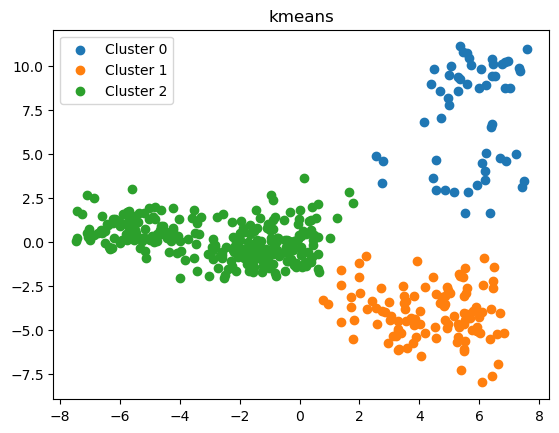

In [10]:
d2_pca['kmeans_labels'] = kmeans.labels_
for cluster_idx in range(3):
        cluster = d2_pca.loc[d2_pca['kmeans_labels'] == cluster_idx]
        plt.scatter(cluster[0], cluster[1], label = f'Cluster {cluster_idx}')
plt.title('kmeans')
plt.legend()

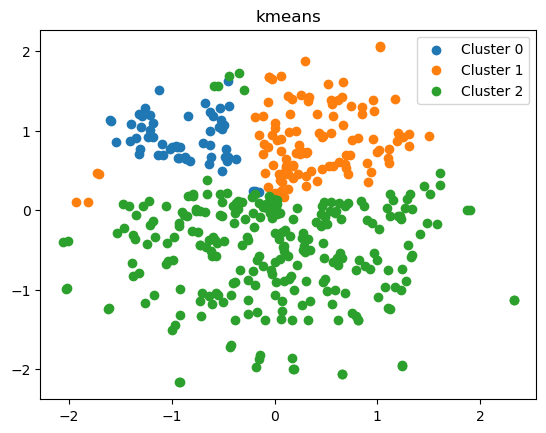

In [39]:
d2_tsne['kmeans_labels'] = kmeans.labels_
for cluster_idx in range(3):
        cluster = d2_tsne.loc[d2_tsne['kmeans_labels'] == cluster_idx]
        plt.scatter(cluster[0], cluster[1], label = f'Cluster {cluster_idx}')
plt.title('kmeans')
plt.legend()

### Affinity Propagation

In [12]:
%%time
affinitypropagation = AffinityPropagation(random_state=42)
affinitypropagation.fit(X)
affinitypropagation_sil_score = round(silhouette_score(X, affinitypropagation.labels_, metric = 'euclidean'),3)
affinitypropagation_cal_hara_score = round(calinski_harabasz_score(X, affinitypropagation.labels_),3)
print(f'Silhouette score: {affinitypropagation_sil_score}')
print(f'Calinski-Harabasz: {affinitypropagation_cal_hara_score}')
score_table.loc['affinitypropagation'] = [affinitypropagation_sil_score, affinitypropagation_cal_hara_score]

Silhouette score: 0.013
Calinski-Harabasz: 2.25
CPU times: user 588 ms, sys: 1.49 s, total: 2.08 s
Wall time: 176 ms


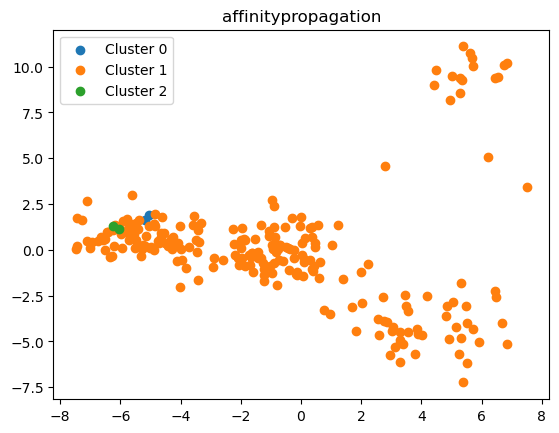

In [13]:
d2_pca['affinitypropagation_labels'] = affinitypropagation.labels_
for cluster_idx in range(3):
        cluster = d2_pca.loc[d2_pca['affinitypropagation_labels'] == cluster_idx]
        plt.scatter(cluster[0], cluster[1], label = f'Cluster {cluster_idx}')
plt.title('affinitypropagation')
plt.legend()

### MeanShift

In [14]:
%%time
meanshift = MeanShift(bandwidth=27)
meanshift.fit(X)
meanshift_sil_score = round(silhouette_score(X, meanshift.labels_, metric = 'euclidean'),3)
meanshift_cal_hara_score = round(calinski_harabasz_score(X, meanshift.labels_),3)
print(f'Silhouette score: {meanshift_sil_score}')
print(f'Calinski-Harabasz: {meanshift_cal_hara_score}')
score_table.loc['meanshift'] = [meanshift_sil_score, meanshift_cal_hara_score]

Silhouette score: 0.019
Calinski-Harabasz: 1.383
CPU times: user 52.5 s, sys: 2.7 s, total: 55.2 s
Wall time: 3.85 s


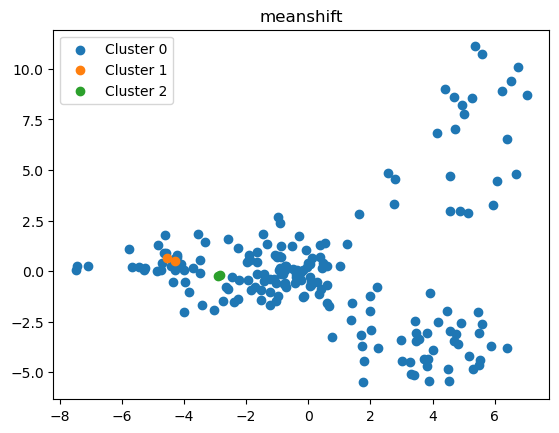

In [15]:
d2_pca['meanshift_labels'] = meanshift.labels_
for cluster_idx in range(3):
        cluster = d2_pca.loc[d2_pca['meanshift_labels'] == cluster_idx]
        plt.scatter(cluster[0], cluster[1], label = f'Cluster {cluster_idx}')
plt.title('meanshift')
plt.legend()

### Spectral Clustering

In [16]:
%%time
spectralclustering = SpectralClustering(n_clusters = 3, random_state=42)
spectralclustering.fit(X)
spectralclustering_sil_score = round(silhouette_score(X, spectralclustering.labels_, metric = 'euclidean'),3)
spectralclustering_cal_hara_score = round(calinski_harabasz_score(X, spectralclustering.labels_),3)
print(f'Silhouette score: {spectralclustering_sil_score}')
print(f'Calinski-Harabasz: {spectralclustering_cal_hara_score}')
score_table.loc['spectralclustering'] = [spectralclustering_sil_score, spectralclustering_cal_hara_score]

/home/LC/kollad01/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette score: 0.006
Calinski-Harabasz: 1.652
CPU times: user 2.36 s, sys: 4.34 s, total: 6.71 s
Wall time: 370 ms


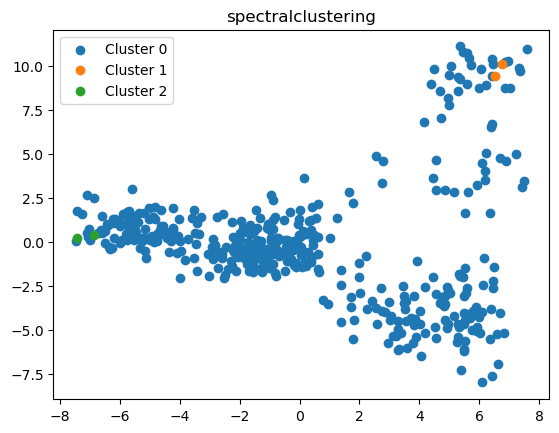

In [17]:
d2_pca['spectralclustering_labels'] = spectralclustering.labels_
for cluster_idx in range(3):
        cluster = d2_pca.loc[d2_pca['spectralclustering_labels'] == cluster_idx]
        plt.scatter(cluster[0], cluster[1], label = f'Cluster {cluster_idx}')
plt.title('spectralclustering')
plt.legend()

### Agglomerative Clustering : Ward

In [18]:
%%time
ward = AgglomerativeClustering(n_clusters = 3, linkage='ward')
ward.fit(X)
ward_sil_score = round(silhouette_score(X, ward.labels_, metric = 'euclidean'),3)
ward_cal_hara_score = round(calinski_harabasz_score(X, ward.labels_),3)
print(f'Silhouette score: {ward_sil_score}')
print(f'Calinski-Harabasz: {ward_cal_hara_score}')
score_table.loc['ward'] = [ward_sil_score, ward_cal_hara_score]

Silhouette score: 0.028
Calinski-Harabasz: 8.316
CPU times: user 294 ms, sys: 301 ms, total: 595 ms
Wall time: 213 ms


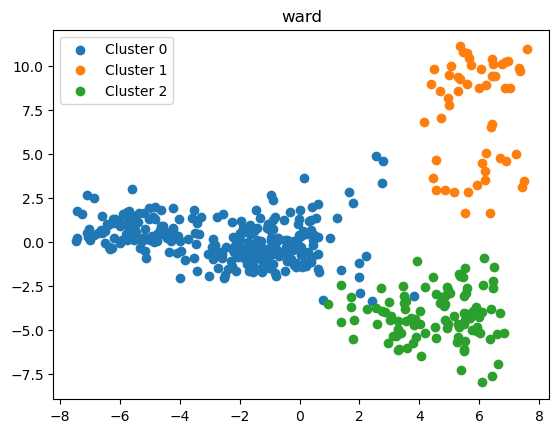

In [19]:
d2_pca['ward_labels'] = ward.labels_
for cluster_idx in range(3):
        cluster = d2_pca.loc[d2_pca['ward_labels'] == cluster_idx]
        plt.scatter(cluster[0], cluster[1], label = f'Cluster {cluster_idx}')
plt.title('ward')
plt.legend()

### Agglomerative Clustering : Single

In [63]:
%%time
single = AgglomerativeClustering(n_clusters = 3, metric = 'manhattan',
                                 linkage='single')
single.fit(X)
single_sil_score = round(silhouette_score(X, single.labels_, metric = 'euclidean'),3)
single_cal_hara_score = round(calinski_harabasz_score(X, single.labels_),3)
print(f'Silhouette score: {single_sil_score}')
print(f'Calinski-Harabasz: {single_cal_hara_score}')
score_table.loc['single'] = [single_sil_score, single_cal_hara_score]

Silhouette score: 0.057
Calinski-Harabasz: 1.98
CPU times: user 601 ms, sys: 288 ms, total: 889 ms
Wall time: 511 ms


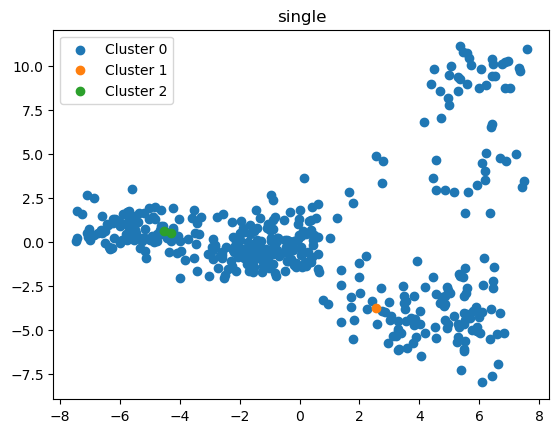

In [64]:
d2_pca['single_labels'] = single.labels_
for cluster_idx in range(3):
        cluster = d2_pca.loc[d2_pca['single_labels'] == cluster_idx]
        plt.scatter(cluster[0], cluster[1], label = f'Cluster {cluster_idx}')
plt.title('single')
plt.legend()

### Agglomerative Clustering : Average

In [22]:
%%time
average = AgglomerativeClustering(n_clusters = 3, linkage='average')
average.fit(X)
average_sil_score = round(silhouette_score(X, average.labels_, metric = 'euclidean'),3)
average_cal_hara_score = round(calinski_harabasz_score(X, average.labels_),3)
print(f'Silhouette score: {average_sil_score}')
print(f'Calinski-Harabasz: {average_cal_hara_score}')
score_table.loc['average'] = [average_sil_score, average_cal_hara_score]

Silhouette score: 0.065
Calinski-Harabasz: 2.004
CPU times: user 305 ms, sys: 290 ms, total: 595 ms
Wall time: 209 ms


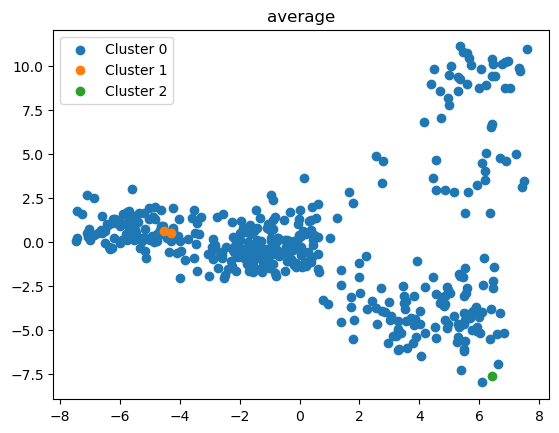

In [23]:
d2_pca['average_labels'] = average.labels_
for cluster_idx in range(3):
        cluster = d2_pca.loc[d2_pca['average_labels'] == cluster_idx]
        plt.scatter(cluster[0], cluster[1], label = f'Cluster {cluster_idx}')
plt.title('average')
plt.legend()

### Agglomerative Clustering : Complete

In [24]:
%%time
complete = AgglomerativeClustering(n_clusters = 3, linkage='complete')
complete.fit(X)
complete_sil_score = round(silhouette_score(X, complete.labels_, metric = 'euclidean'),3)
complete_cal_hara_score = round(calinski_harabasz_score(X, complete.labels_),3)
print(f'Silhouette score: {complete_sil_score}')
print(f'Calinski-Harabasz: {complete_cal_hara_score}')
score_table.loc['complete'] = [complete_sil_score, complete_cal_hara_score]

Silhouette score: 0.024
Calinski-Harabasz: 4.834
CPU times: user 332 ms, sys: 268 ms, total: 600 ms
Wall time: 210 ms


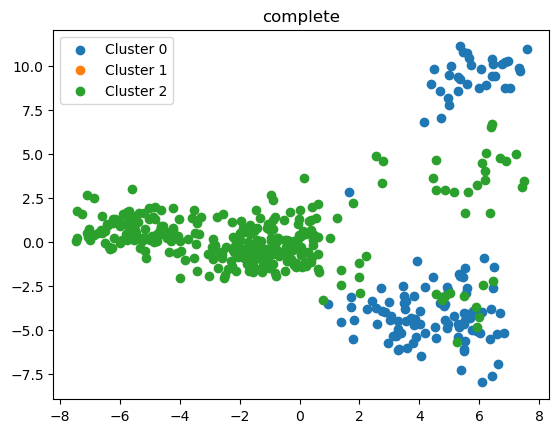

In [25]:
d2_pca['complete_labels'] = complete.labels_
for cluster_idx in range(3):
        cluster = d2_pca.loc[d2_pca['complete_labels'] == cluster_idx]
        plt.scatter(cluster[0], cluster[1], label = f'Cluster {cluster_idx}')
plt.title('complete')
plt.legend()

### DBSCAN

In [26]:
%%time
dbscan = DBSCAN(eps=30)
dbscan.fit(X)
dbscan_sil_score = round(silhouette_score(X, dbscan.labels_, metric = 'euclidean'),3)
dbscan_cal_hara_score = round(calinski_harabasz_score(X, dbscan.labels_),3)
print(f'Silhouette score: {dbscan_sil_score}')
print(f'Calinski-Harabasz: {dbscan_cal_hara_score}')
score_table.loc['dbscan'] = [dbscan_sil_score, dbscan_cal_hara_score]

Silhouette score: 0.049
Calinski-Harabasz: 1.588
CPU times: user 374 ms, sys: 336 ms, total: 709 ms
Wall time: 109 ms


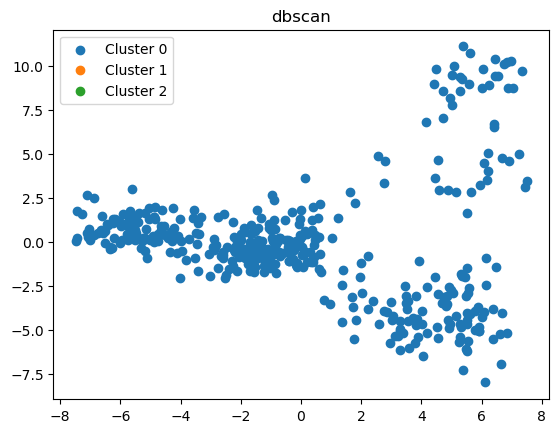

In [27]:
d2_pca['dbscan_labels'] = dbscan.labels_
for cluster_idx in range(3):
        cluster = d2_pca.loc[d2_pca['dbscan_labels'] == cluster_idx]
        plt.scatter(cluster[0], cluster[1], label = f'Cluster {cluster_idx}')
plt.title('dbscan')
plt.legend()

### HDBSCAN

In [58]:
%%time
hdbscan = HDBSCAN() 
hdbscan.fit(X)
print(hdbscan.labels_)
hdbscan_sil_score = round(silhouette_score(X, hdbscan.labels_, metric = 'euclidean'),3)
hdbscan_cal_hara_score = round(calinski_harabasz_score(X, hdbscan.labels_),3)
print(f'Silhouette score: {hdbscan_sil_score}')
print(f'Calinski-Harabasz: {hdbscan_cal_hara_score}')
score_table.loc['hdbscan'] = [hdbscan_sil_score, hdbscan_cal_hara_score]

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

### OPTICS

In [29]:
%%time
optics = OPTICS()
optics.fit(X)
print(optics.labels_)
optics_sil_score = round(silhouette_score(X, optics.labels_, metric = 'euclidean'),3)
optics_cal_hara_score = round(calinski_harabasz_score(X, optics.labels_),3)
print(f'Silhouette score: {optics_sil_score}')
print(f'Calinski-Harabasz: {optics_cal_hara_score}')
score_table.loc['optics'] = [optics_sil_score, optics_cal_hara_score]

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

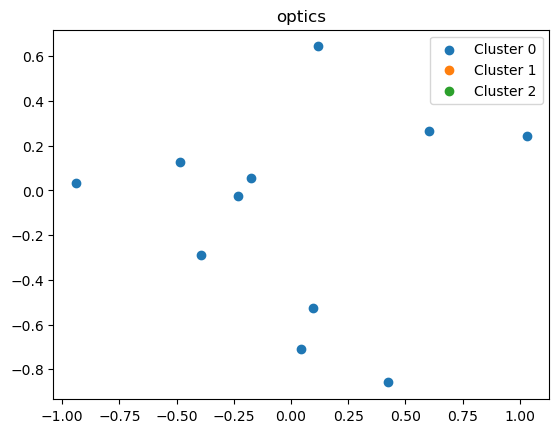

In [30]:
d2_pca['optics_labels'] = optics.labels_
for cluster_idx in range(3):
        cluster = d2_pca.loc[d2_pca['optics_labels'] == cluster_idx]
        plt.scatter(cluster[0], cluster[1], label = f'Cluster {cluster_idx}')
plt.title('optics')
plt.legend()

### BIRCH

In [31]:
%%time
birch = Birch(n_clusters=3)
birch.fit(X)
print(birch.labels_)
birch_sil_score = round(silhouette_score(X, birch.labels_, metric = 'euclidean'),3)
birch_cal_hara_score = round(calinski_harabasz_score(X, birch.labels_),3)
print(f'Silhouette score: {birch_sil_score}')
print(f'Calinski-Harabasz: {birch_cal_hara_score}')
score_table.loc['birch'] = [birch_sil_score, birch_cal_hara_score]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 2 2 1 2 2 1 2 2 1 1 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0
 0 2 2 2 0 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 2 2 1 2 2 1 1 2 2 0 0 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 0 0 0 0 0 0 0 0 0 0
 0 2 2 2 2 2 2 2 2 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 0 0 1 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 0 2 0 0
 0 1 2 2 2 0 0 0 0 0 1 1 2 2 1 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 1 1 1 1 1]
Silhouette score: 0.028
Calinski-Harabasz: 8.316
CPU times: user 1.62 s, s

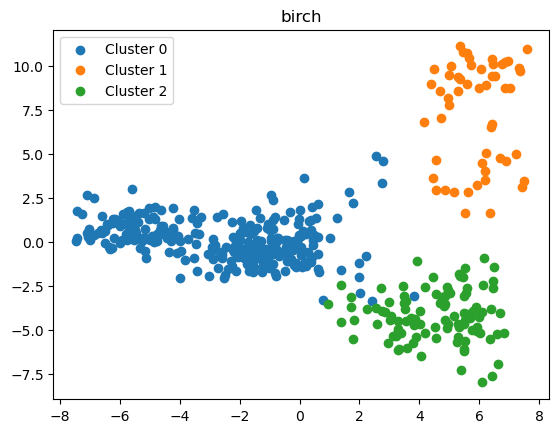

In [32]:
d2_pca['birch_labels'] = birch.labels_
for cluster_idx in range(3):
        cluster = d2_pca.loc[d2_pca['birch_labels'] == cluster_idx]
        plt.scatter(cluster[0], cluster[1], label = f'Cluster {cluster_idx}')
plt.title('birch')
plt.legend()

### Gaussian Mixture

In [33]:
%%time
gaussianmixture = GaussianMixture(verbose=True, n_components=3)
gaussianmixture_labels = gaussianmixture.fit_predict(X)
print(gaussianmixture_labels)
gaussianmixture_sil_score = round(silhouette_score(X, gaussianmixture_labels, metric = 'euclidean'),3)
gaussianmixture_cal_hara_score = round(calinski_harabasz_score(X, gaussianmixture_labels),3)
print(f'Silhouette score: {gaussianmixture_sil_score}')
print(f'Calinski-Harabasz: {gaussianmixture_cal_hara_score}')
score_table.loc['gaussianmixture'] = [gaussianmixture_sil_score, gaussianmixture_cal_hara_score]

Initialization 0
Initialization converged: True
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2]
Silhouette score: 0.013
Ca

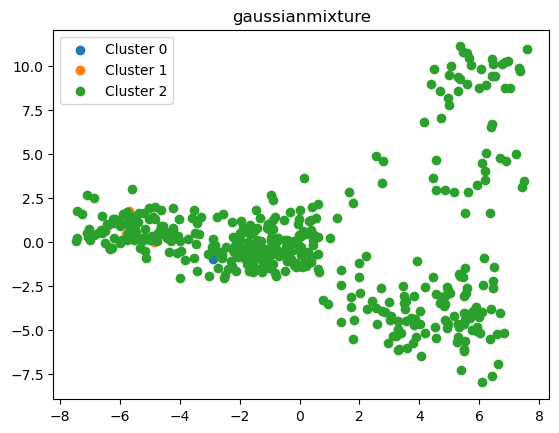

In [34]:
d2_pca['gaussianmixture_labels'] = gaussianmixture_labels
for cluster_idx in range(3):
        cluster = d2_pca.loc[d2_pca['gaussianmixture_labels'] == cluster_idx]
        plt.scatter(cluster[0], cluster[1], label = f'Cluster {cluster_idx}')
plt.title('gaussianmixture')
plt.legend()

In [35]:
score_table.sort_values(by='Silhouette score',ascending=False)

,Silhouette score,Calinski-Harabasz
average,0.065,2.004
single,0.064,2.002
dbscan,0.049,1.588
ward,0.028,8.316
birch,0.028,8.316
kmeans,0.025,8.472
complete,0.024,4.834
meanshift,0.019,1.383
affinitypropagation,0.013,2.250
gaussianmixture,0.013,1.521


map what we have